# Random Sampling and distance-based Statistics

In [1]:
import numpy as np
import pylab as plt
import scipy.stats as st
import seaborn as sns

a very useful notion in statistics is the idea of (pseudo-)distance between samples.

given two observation, we can compute 

# Perfect Sampling (Bayesian statistics)

http://www.sumsar.net/blog/2014/10/tiny-data-and-the-socks-of-karl-broman/

we observe a biased coin with 7 heads and 3 tails.

from formal analysis, we can derive the distribution as ${Beta}(7+\alpha, 3+\beta)$

for these analysis there is no significant advantage in using the low-divergence sequences, so we'll work with standard random numbers.

In [2]:
def plot_beta(dist, ax=None, base=np.linspace(0, 1, 10_000), **kwargs):
    if ax is None:
        ax=plt.gca()
    pdf = dist.pdf(base)
    kwargs.setdefault("alpha", 0.5)
    ax.fill_between(base, pdf, 0, **kwargs)

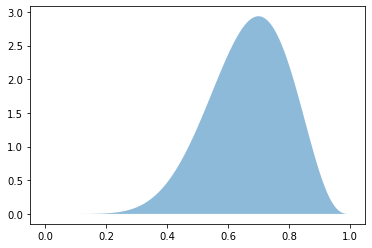

In [3]:
α, β = 1, 1
true_posterior = st.beta(7+α, 3+β)
plot_beta(true_posterior)

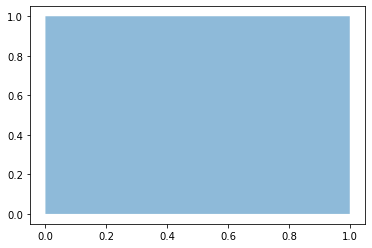

In [4]:
α, β = 1, 1
prior = st.beta(α, β)
plot_beta(prior)

In [5]:
N_samples = 1_0
sampled_prior = prior.rvs(N_samples)

In [6]:
st.binom.rvs(n=10, p=sampled_prior)

array([ 0,  3,  4,  6,  8, 10,  6,  8,  7, 10])

In [7]:
fake_observations = st.binom.rvs(n=10, p=sampled_prior)

In [8]:
observed = 7
coherent = (fake_observations==7)
selected_prior = sampled_prior[coherent]
print(len(selected_prior))

1


In [14]:
observed = 7
N_samples = 100
sampled_prior = prior.rvs(N_samples)
fake_observations = st.binom.rvs(n=10, p=sampled_prior)
coherent = (fake_observations==7)
selected_prior = sampled_prior[coherent]
print(len(selected_prior))

12


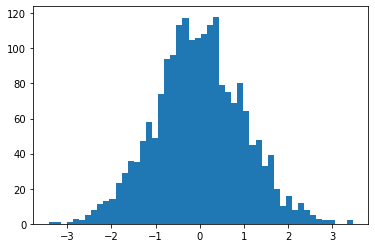

In [15]:
plt.hist(st.norm.isf(plt.rand(2000)), bins=50);

In [16]:
st.binom(n=10, p=sampled_prior).isf(plt.rand(len(sampled_prior)))

array([ 1.,  0.,  2.,  0.,  7.,  2.,  0., 10.,  2.,  2.,  1.,  2.,  5.,
        5.,  9.,  0.,  3., 10.,  0.,  2.,  5.,  9.,  2.,  2.,  0., 10.,
        5.,  5.,  8.,  1.,  1.,  8.,  5.,  5.,  1., 10.,  2.,  2.,  2.,
        1.,  2.,  0.,  6.,  6.,  0.,  6.,  4.,  4.,  1.,  0.,  9.,  8.,
        2.,  1.,  5.,  4.,  7.,  1.,  4.,  2.,  8.,  7.,  3.,  3.,  2.,
        4.,  5.,  0.,  2.,  6.,  2.,  5.,  2.,  7.,  6., 10.,  8.,  0.,
        4.,  9.,  3.,  6.,  9.,  3.,  2.,  6.,  7.,  0.,  9.,  3.,  5.,
        2.,  7.,  1.,  8.,  6.,  2.,  6., 10.,  8.])

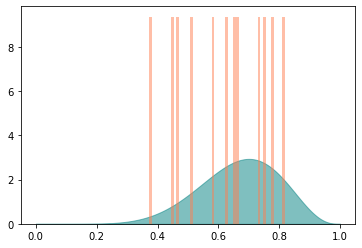

In [17]:
plt.hist(selected_prior, bins=50, density=True, alpha=0.5, color="coral");
plot_beta(true_posterior, color='teal')

In [28]:
%%time
observed = 7
N_samples = 100_000
sampled_prior = prior.rvs(N_samples)
fake_observations = st.binom.rvs(n=10, p=sampled_prior)
coherent = (fake_observations==7)
selected_prior = sampled_prior[coherent]
n_accepted = len(selected_prior)
s = "accepted samples: {}\nacceptance fraction: {}%\n-----"
print(s.format(n_accepted, 100*n_accepted/N_samples))

accepted samples: 9080
acceptance fraction: 9.08%
-----
CPU times: user 56.6 ms, sys: 3.26 ms, total: 59.9 ms
Wall time: 58.1 ms


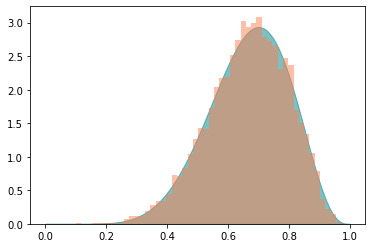

In [21]:
plt.hist(selected_prior, bins=50, density=True, alpha=0.5, color="coral");
plot_beta(true_posterior, color='teal')

# how do different priors affect me?

In [35]:
def fit_probability(successes=7, failures=3, α=1, β=1, N_samples=100_000):
    prior = st.beta(α, β)
    true_posterior = st.beta(successes+α, failures+β)
    sampled_prior = prior.rvs(N_samples)
    n_observations = successes+failures
    fake_observations = st.binom.rvs(n=n_observations, p=sampled_prior)
    coherent = (fake_observations==successes)
    selected_prior = sampled_prior[coherent]
    return prior, true_posterior, selected_prior

accepted samples: 6628
acceptance fraction: 6.628%
-----


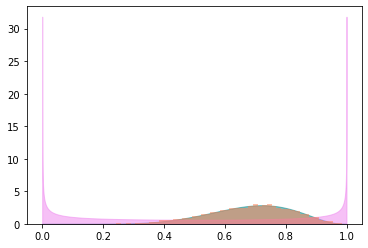

In [38]:
result = fit_probability(successes=7, failures=3, α=0.5, β=0.5, N_samples=100_000)
prior, true_posterior, selected_prior = result
n_accepted = len(selected_prior)
s = "accepted samples: {}\nacceptance fraction: {}%\n-----"
print(s.format(n_accepted, 100*n_accepted/N_samples))
plt.hist(selected_prior, bins=50, density=True, alpha=0.5, color="coral");
plot_beta(true_posterior, color='teal')
plot_beta(prior, color='violet')

accepted samples: 9069
acceptance fraction: 9.069%
-----


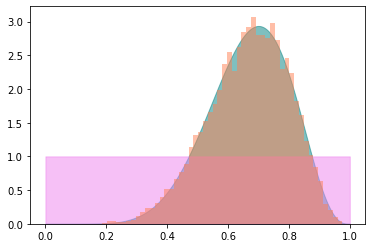

In [37]:
result = fit_probability(successes=7, failures=3, α=1, β=1, N_samples=100_000)
prior, true_posterior, selected_prior = result
n_accepted = len(selected_prior)
s = "accepted samples: {}\nacceptance fraction: {}%\n-----"
print(s.format(n_accepted, 100*n_accepted/N_samples))
plt.hist(selected_prior, bins=50, density=True, alpha=0.5, color="coral");
plot_beta(true_posterior, color='teal')
plot_beta(prior, color='violet')

accepted samples: 11192
acceptance fraction: 11.192%
-----


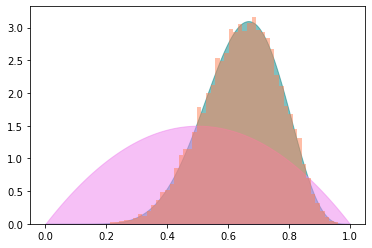

In [33]:
result = fit_probability(successes=7, failures=3, α=1, β=1, N_samples=100_000)
prior, true_posterior, selected_prior = result
n_accepted = len(selected_prior)
s = "accepted samples: {}\nacceptance fraction: {}%\n-----"
print(s.format(n_accepted, 100*n_accepted/N_samples))
plt.hist(selected_prior, bins=50, density=True, alpha=0.5, color="coral");
plot_beta(true_posterior, color='teal')
plot_beta(prior, color='violet')

accepted samples: 12536
acceptance fraction: 12.536%
-----


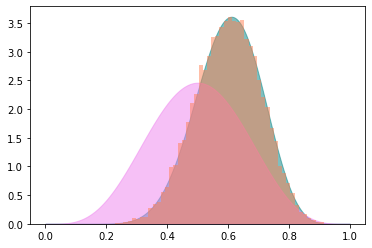

In [39]:
result = fit_probability(successes=7, failures=3, α=5, β=5, N_samples=100_000)
prior, true_posterior, selected_prior = result
n_accepted = len(selected_prior)
s = "accepted samples: {}\nacceptance fraction: {}%\n-----"
print(s.format(n_accepted, 100*n_accepted/N_samples))
plt.hist(selected_prior, bins=50, density=True, alpha=0.5, color="coral");
plot_beta(true_posterior, color='teal')
plot_beta(prior, color='violet')

accepted samples: 11987
acceptance fraction: 11.987%
-----


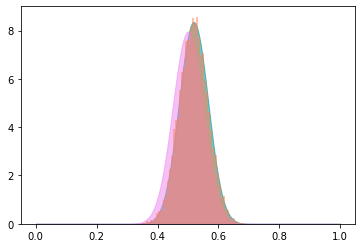

In [40]:
result = fit_probability(successes=7, failures=3, α=50, β=50, N_samples=100_000)
prior, true_posterior, selected_prior = result
n_accepted = len(selected_prior)
s = "accepted samples: {}\nacceptance fraction: {}%\n-----"
print(s.format(n_accepted, 100*n_accepted/N_samples))
plt.hist(selected_prior, bins=50, density=True, alpha=0.5, color="coral");
plot_beta(true_posterior, color='teal')
plot_beta(prior, color='violet')

# discontinuous model

we could try to decide if the coin is biased or not, rather than estimating a probability

to do this, we need hyperparameters describing the set of models

In [95]:
α_of_bias, β_of_bias = 1, 1
belief_coin_biased = 0.1

n_observations = 10
successes = 10

N_samples = 100_000

coin_is_biased_prior = st.binom(n=1, p=belief_coin_biased)
coin_is_biased_prior_samples = coin_is_biased_prior.rvs(N_samples).astype(bool)

p_coin_if_biased_prior = st.beta(α_of_bias, β_of_bias)
p_coin_if_biased_prior_samples = p_coin_if_biased_prior.rvs(N_samples)

p_coin_effective = np.where(coin_is_biased_prior_samples, p_coin_if_biased_prior_samples, 0.5)

fake_observations = st.binom.rvs(n=n_observations, p=p_coin_effective)
coherent = (fake_observations==successes)
p_coin_posterior = p_coin_effective[coherent]
p_coin_posterior_if_biased = p_coin_effective[coherent&coin_is_biased_prior_samples]
p_coin_is_biased_posterior = (coin_is_biased_prior_samples&coherent).sum()/coherent.sum()

print(coherent.sum())
print(len(p_coin_posterior_if_biased))
print(p_coin_is_biased_posterior)

971
890
0.9165808444902163


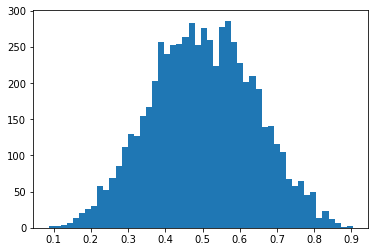

In [90]:
plt.hist(p_coin_posterior_if_biased, bins=50);

In [99]:
st.binom.rvs(n=10, p=[0.1, 0.9], size=(4, 2))

array([[ 2,  7],
       [ 2,  9],
       [ 1, 10],
       [ 1,  8]])

# What happens if we have multiple coins?

In [128]:
np.random.seed(2)
observed = np.array([7, 8, 9])
n_trials = len(observed)

N_samples = 6
prior = st.beta(1, 1)
sampled_prior = prior.rvs(N_samples)
fake_observations = st.binom.rvs(n=10, p=sampled_prior, size=(n_trials, N_samples))

In [129]:
fake_observations

array([[10,  4,  4,  2,  4,  0],
       [10,  8,  6,  1,  7,  2],
       [10,  8,  7,  2,  5,  1]])

In [130]:
fake_observations==observed.reshape(-1, 1)

array([[False, False, False, False, False, False],
       [False,  True, False, False, False, False],
       [False, False, False, False, False, False]])

In [131]:
(fake_observations==observed.reshape(-1, 1)).all(axis=0)

array([False, False, False, False, False, False])

In [138]:
np.random.seed(2)
observed = np.array([7, 8, 9])
n_trials = len(observed)

N_samples = 1_000_000
prior = st.beta(1, 1)
sampled_prior = prior.rvs(N_samples)
fake_observations = st.binom.rvs(n=10, p=sampled_prior, size=(n_trials, N_samples))
(fake_observations==observed.reshape(-1, 1)).all(axis=0).sum()

2972

very low acceptance stops us from finding results

but we're being too bad with ourselves: we don't care about the ordering of the data, as it is completely arbitrary!

we might test the **sorted** data!

In [133]:
np.random.seed(2)
observed = np.array([7, 8, 9])
n_trials = len(observed)

N_samples = 6
prior = st.beta(1, 1)
sampled_prior = prior.rvs(N_samples)
fake_observations = st.binom.rvs(n=10, p=sampled_prior, size=(n_trials, N_samples))

In [134]:
fake_observations

array([[10,  4,  4,  2,  4,  0],
       [10,  8,  6,  1,  7,  2],
       [10,  8,  7,  2,  5,  1]])

In [135]:
np.sort(fake_observations, axis=0)

array([[10,  4,  4,  1,  4,  0],
       [10,  8,  6,  2,  5,  1],
       [10,  8,  7,  2,  7,  2]])

In [139]:
np.random.seed(2)
observed = np.array([7, 8, 9]).reshape(-1, 1)
n_trials = len(observed)

N_samples = 1_000_000
prior = st.beta(1, 1)
sampled_prior = prior.rvs(N_samples)
fake_observations = st.binom.rvs(n=10, p=sampled_prior, size=(n_trials, N_samples))

fake_observations = np.sort(fake_observations, axis=0)
observed = np.sort(observed, axis=0)

(fake_observations==observed).all(axis=0).sum()

17555

In [140]:
17555/2972

5.906796769851952

we captured 6 times more cases!